In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [34]:
bank = pd.read_csv(r'C:\Users\majet\OneDrive\Desktop\chandana\Internship\projects\bank\bank-additional-full_cleaned.csv')

In [35]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [36]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


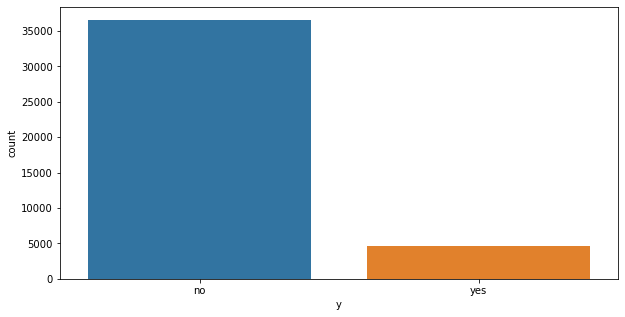

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(bank.y)
plt.show()

In [6]:
!pip install imbalanced-learn

In [38]:

bank.shape
bank.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [39]:
# class count
y_count_no, y_count_true = bank['y'].value_counts()

# divie class
y_no = bank[bank['y'] == "no"]
y_true = bank[bank['y'] == "yes"]

In [40]:
print('class no:', y_no.shape)
print('\nclass yes:', y_true.shape)

class no: (36548, 21)

class yes: (4640, 21)


# Re-sampling - over sampling

total class of 1 and 0:
 yes    36548
no     36548
Name: y, dtype: int64


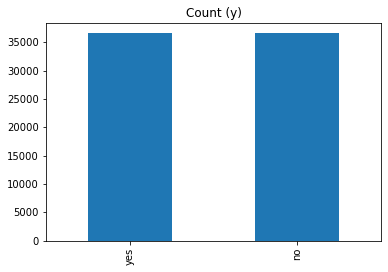

In [41]:
y_true_over = y_true.sample(y_count_no, replace = True)

test_over = pd.concat([y_true_over, y_no], axis=0)

print("total class of 1 and 0:\n",test_over['y'].value_counts())

test_over['y'].value_counts().plot(kind='bar', title='Count (y)')
plt.show()

In [42]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [43]:
x = bank.drop("y", axis=1)
y = bank["y"]

In [44]:
!pip install scikit-learn